# PCA practice

### import model

In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Load mnist

In [4]:
digits = load_digits()

C:\Users\Master\Anaconda3\lib\site-packages\sklearn\datasets\base.py:550: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = data[:, -1].astype(np.int)


In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.data.shape

(1797, 64)

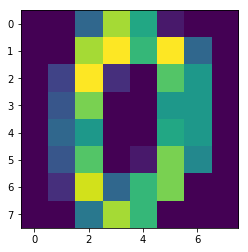

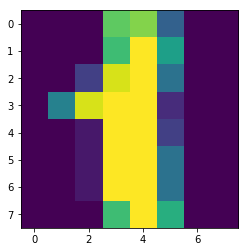

In [7]:
for i in range(2):
    plt.figure(figsize=(10, 4))
    plt.imshow(digits.data[i].reshape(8, 8))

In [8]:
digits.target[0]

0

In [9]:
digits.target[1]

1

### 使用2個主成分解釋

In [10]:
pca = PCA(2)
model = pca.fit_transform(digits.data) #使用PCA模型
print(digits.data.shape)
print(model.shape)

(1797, 64)
(1797, 2)


In [11]:
print(model)

[[ -1.25946756  21.27488534]
 [  7.95761172 -20.7687001 ]
 [  6.99192351  -9.95598814]
 ...
 [ 10.80128302  -6.96025288]
 [ -4.87210617  12.42396543]
 [ -0.34439132   6.36555299]]


In [12]:
pca = PCA(2)
model = pca.fit(digits.data)
print(digits.data.shape)
print(model)

(1797, 64)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [13]:
model.transform(digits.data)

array([[ -1.25946648,  21.27488332],
       [  7.95761116, -20.76869896],
       [  6.99192306,  -9.9559863 ],
       ...,
       [ 10.80128386,  -6.96025241],
       [ -4.87210029,  12.42395375],
       [ -0.34438939,   6.36554913]])

In [14]:
pca = PCA(2)
model = pca.fit_transform(digits.data) #使用PCA模型

In [15]:
print('x : ', model[:, 0].shape)
print('y : ', model[:, 1].shape)
print('c : ', digits.target.shape)

x :  (1797,)
y :  (1797,)
c :  (1797,)


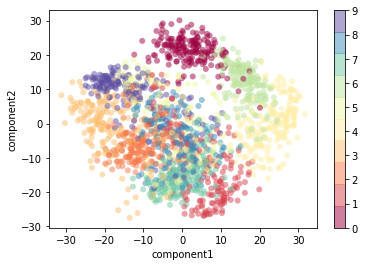

In [32]:
plt.scatter(model[:, 0], model[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component1')
plt.ylabel('component2')
plt.colorbar()

### 選擇成分數量 - 可解釋變異數

Text(0, 0.5, 'cumulative explained variance')

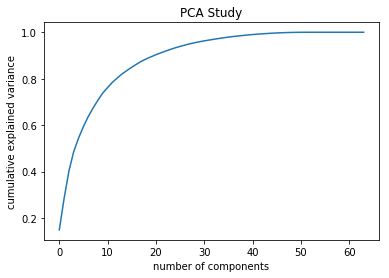

In [34]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA Study')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### 累積已解釋變異量，可以用來評量PCA保留資料內的好壞程度

### 使用PCA做雜訊過濾

### 先列印出40個沒有經過雜訊過濾的數字來看看

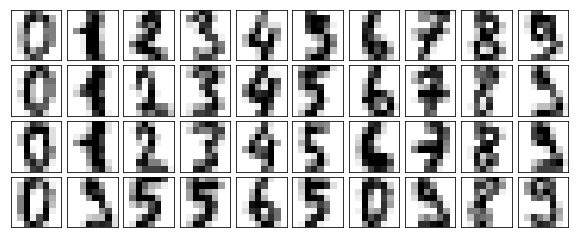

In [35]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

### 加上一些隨機的雜訊已建立雜訊資料集，再重畫一次看看，使用高斯隨機雜訊的數字元

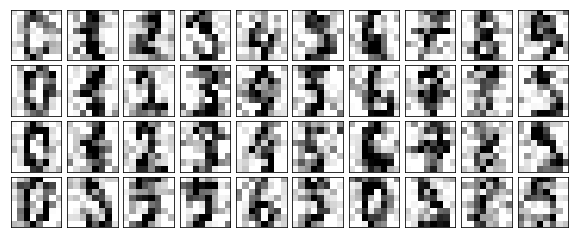

In [36]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [45]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [44]:
noisy[0]

array([ 1.98685661, -0.5530572 ,  7.59075415, 19.09211943,  8.0633865 ,
        0.06345217,  6.31685126,  3.06973892, -1.87789754,  2.17024017,
       11.14632923, 13.13708099, 10.96784909,  7.34687902, -1.89967133,
       -2.24915012, -4.05132448,  4.25698933, 11.3679037 , -3.64921481,
        5.86259508, 10.0968948 ,  8.27011282, -5.69899274, -2.1775309 ,
        4.44369036,  7.39602569,  1.50279207, -2.40255476,  6.833225  ,
        5.59317355,  7.40911274, -0.0539889 ,  0.76915628, 11.29017965,
       -4.8833746 ,  0.83545438,  1.1613195 ,  2.6872558 ,  0.78744494,
        2.95386632,  4.68547312, 10.53740687, -1.20441478, -4.91408796,
        9.12062317,  5.15744492,  4.2284889 ,  1.37447316, -5.05216062,
       15.29633588,  3.45967088,  7.292312  , 14.44670516,  4.12399809,
        3.72512048, -3.35687009, -1.2368495 ,  7.32505373, 16.90218051,
        8.08330305, -0.74263591, -4.4253399 , -4.7848265 ])

### 計算保留50%的變異量需要幾個主成分

In [37]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

In [38]:
pca

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
pca = PCA(0.5).fit_transform(noisy)
pca

array([[ -9.82613291,  19.60311879,  -3.49445446, ...,   7.26107832,
          0.58419145,   1.8438046 ],
       [ 14.65827166, -15.58079811,  11.61685625, ...,   5.96816258,
          1.69008628,  -7.38319027],
       [  5.30646513, -14.73205492,   0.26421735, ...,  -4.26313868,
         -2.47186264,  -7.46461662],
       ...,
       [  7.71966027,  -6.95777476,  -6.08565658, ..., -10.8659198 ,
          5.73479747,   5.54420925],
       [ -8.91737494,  11.35437432, -11.91713483, ..., -11.08482921,
          3.23292014,   0.46439398],
       [ -6.88599972,   3.56177468,  14.54014659, ..., -12.42281561,
          0.88588017,  10.20443299]])

In [41]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

In [42]:
pca

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### 開始使用PCA來除去雜訊部分

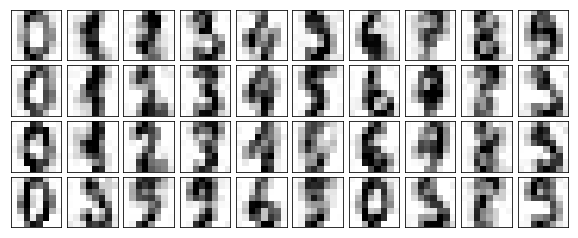

In [43]:
components = pca.transform(noisy) #只留下12個主成分
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### 如果保留90%呢?

In [42]:
pca = PCA(0.9).fit(noisy)
pca.n_components_

49

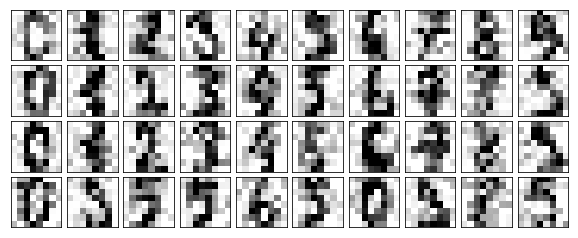

In [43]:
components = pca.transform(noisy) #只留下12個主成分
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### 特徵臉

In [46]:
from sklearn.datasets import fetch_lfw_people

In [47]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [48]:
#from sklearn.decomposition import RandomizedPCA

In [49]:
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

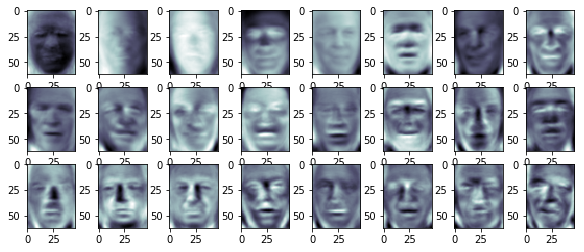

In [50]:
fig, axes = plt.subplots(3, 8, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Text(0, 0.5, 'cumulative explained variance')

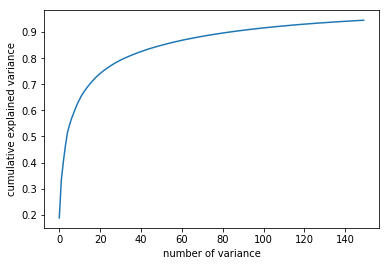

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of variance')
plt.ylabel('cumulative explained variance')

### 圖中可以看到150個成分就有超過90%的變異量，可以利用150個成分就能復原這些資料的大部分特性

In [52]:
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)

In [53]:
components

array([[ 1.1430276e+03,  6.3319971e+02,  6.3019421e+02, ...,
         2.9710796e+01, -1.9555153e+01, -3.9155499e+01],
       [ 6.9656580e+02, -6.5734119e+02,  4.6728757e+02, ...,
         2.9876589e+01, -2.0805840e+01, -6.1547279e+01],
       [ 3.5894760e+01, -2.7059531e+02,  2.5938608e+02, ...,
        -1.4261014e+00,  3.6756310e+01, -2.2235207e+01],
       ...,
       [-5.5098779e+02, -7.0910089e+02,  1.2822812e+02, ...,
         4.2075768e+01,  1.0257374e+00, -6.0211250e+01],
       [-1.5281633e+03, -5.3009668e+02,  4.2297708e+02, ...,
        -4.3024990e+01, -8.7005524e+01,  1.9662237e+01],
       [ 4.9305826e+02, -1.0758872e+02,  3.5798471e+02, ...,
         4.8022594e+01,  5.5051857e+01, -3.0620472e+01]], dtype=float32)

In [54]:
model = pca.inverse_transform(components)

In [55]:
model

array([[ 1.27984283e+02,  1.25778900e+02,  1.24437775e+02, ...,
         3.59351349e+00, -3.32496643e-01, -2.22938538e-01],
       [ 4.76754913e+01,  5.69060326e+01,  7.25339203e+01, ...,
         2.41824081e+02,  2.42414459e+02,  2.41436188e+02],
       [ 8.65992966e+01,  8.42159653e+01,  7.45201263e+01, ...,
         1.24456177e+02,  1.79045410e+02,  2.12727936e+02],
       ...,
       [ 3.27623978e+01,  3.50367508e+01,  4.29503746e+01, ...,
         1.55003510e+02,  1.50096802e+02,  1.48713409e+02],
       [ 6.21769562e+01,  6.87235184e+01,  8.05029755e+01, ...,
         1.78992752e+02,  1.91267670e+02,  1.83650421e+02],
       [ 2.93998413e+01,  3.21979485e+01,  3.17428360e+01, ...,
         2.16132355e+01,  4.36372452e+01,  5.00886040e+01]], dtype=float32)

#### 繪出結果

Text(0, 0.5, '150-dim')

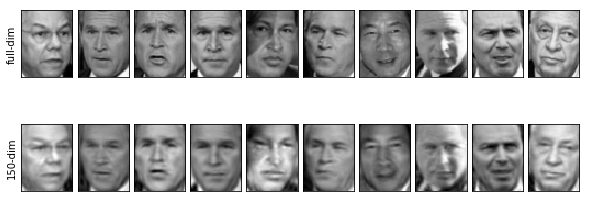

In [56]:
fig, ax = plt.subplots(2, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(model[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim')
ax[1, 0].set_ylabel('150-dim')